In [11]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [12]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [13]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [14]:
# VGG16 model
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                 

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001, learning_rate_decay=0.0001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Train the model
vgg16 = model.fit(train_images, train_labels, epochs=10
                    , validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 62s 34ms/step - loss: 1.9456 - accuracy: 0.2400 - val_loss: 1.7691 - val_accuracy: 0.3041
Epoch 2/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.6872 - accuracy: 0.3405 - val_loss: 1.5692 - val_accuracy: 0.3911
Epoch 3/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.5388 - accuracy: 0.4092 - val_loss: 1.4682 - val_accuracy: 0.4430
Epoch 4/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.4231 - accuracy: 0.4623 - val_loss: 1.3955 - val_accuracy: 0.4742
Epoch 5/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.3104 - accuracy: 0.5120 - val_loss: 1.2796 - val_accuracy: 0.5213
Epoch 6/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.2270 - accuracy: 0.5465 - val_loss: 1.1978 - val_accuracy: 0.5576
Epoch 7/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1491 - accuracy: 0.5780 - val_loss: 1.1789 -

313/313 - 3s - loss: 1.0710 - accuracy: 0.6095 - 3s/epoch - 8ms/step


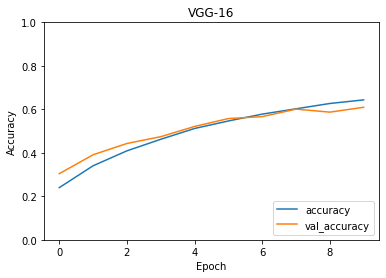

In [17]:
plt.plot(vgg16.history['accuracy'], label='accuracy')
plt.plot(vgg16.history['val_accuracy'], label = 'val_accuracy')
plt.title('VGG-16')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)